# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [3]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

# Look at first 5 rows of each df
print(north_df.head(5))
print(south_df.head(5))

   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0           0  North        Complaint    9:00 AM             Incoming     B   
1           1  North    Sales Support   11:00 AM             Incoming     A   
2           2  North    Sales Support   11:00 AM             Incoming     B   
3           3  North    Sales Support    4:00 PM             Incoming     B   
4           4  North  Product Support   12:00 PM             Incoming     B   

  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0  Brent   NO          0          1             9                  2   
1    Cam   NO          0          0            11                  1   
2   Todd   NO          0          0             9                  3   
3  Brent   NO          0          0            11                  2   
4  Brent   NO          0          0             8                  2   

   Incoming Wait Time  During Call Wait Time  Calls  
0                 1.0                 

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [22]:
# Put your EDA code here
north_rep = north_df['Rep ID'].describe()
print(north_rep)
south_rep = south_df['Rep ID'].describe()
print(south_rep)
north_agg = north_df.agg('mean')
print(north_agg)
south_agg = south_df.agg('mean')
print(south_agg)
north_calls = north_df.groupby('Time Block')['Calls'].value_counts()
print(north_calls)
south_calls = south_df.groupby('Time Block')['Calls'].value_counts()
print(south_calls)

count       245
unique        9
top       Brent
freq         37
Name: Rep ID, dtype: object
count      314
unique      11
top       Eric
freq        35
Name: Rep ID, dtype: object
Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64
Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64
Time Block  Calls
10:00 AM    1        43
11:00 AM    1        25
12:00 PM    1        45
1:00 PM     1        17
2:00 PM     1        35
3:00 PM     1        30
4:00 PM     1        28
5:00 PM     1        17
9:00

### EDA Results

Make note of your results here!

1. How many reps are in each branch? 
9 in the North branch and 11 in the South branch
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
North- 9.99,1.91,3.05,2.97
South- 10.05,1.91,3.00,3.08
3. What is the number of calls taken for each time block?
North- 
10:00 AM        43
11:00 AM        25
12:00 PM        45
1:00 PM         17
2:00 PM         35
3:00 PM         30
4:00 PM         28
5:00 PM         17
9:00 AM         5
South-
10:00 AM         56
11:00 AM         31
12:00 PM         75
1:00 PM          23
2:00 PM          30
3:00 PM          43
4:00 PM          25
5:00 PM          26
9:00 AM          5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [173]:
# Clean your data here
# Question 1: check incoming wait time null values
incoming_north = north_df[north_df['Incoming Wait Time'].isnull()]
incoming_north_calltype = incoming_north['Incoming or Outgoing'].value_counts()
print(incoming_north_calltype)

incoming_south = south_df[south_df['Incoming Wait Time'].isnull()]
incoming_south_calltype = incoming_south['Incoming or Outgoing'].value_counts()
print(incoming_south_calltype)

# Question 2: Look at separate "YES" values for North data
north_df['Sale'] = north_df['Sale'].str.replace('YES ','YES')
print(north_df['Sale'].value_counts())

# Question 3: Check for duplicates
north_dedupped = north_df.drop_duplicates()
print("North:",north_df.shape)
print("North without duplicates:",north_dedupped.shape)
south_dedupped = south_df.drop_duplicates()
print("South:",south_df.shape)
print("South without duplicates:",south_dedupped.shape)

# Question 4: Unnecessary data
north_df = north_df.drop(columns = 'Unnamed: 0')
south_df = south_df.drop(columns = 'Unnamed: 0')
print(south_df.columns)

Outgoing    163
Name: Incoming or Outgoing, dtype: int64
Outgoing    188
Name: Incoming or Outgoing, dtype: int64
NO     234
YES     11
Name: Sale, dtype: int64
North: (245, 14)
North without duplicates: (243, 14)
South: (314, 14)
South without duplicates: (311, 14)
Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
Yes, they all correspond to outgoing calls.
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
I replaced the 'YES ' with 'YES' so there would not be two different values for YES. 
3. Are there duplicates in the two data sets? If there are, how did you handle them? 
There are not any duplicates.
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
I dropped the first column "Unnamed: 0", since it was not necessary for the analyses.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [74]:
# Manipulate data here
df = pd.concat([north_df, south_df])
print(df.shape)
dfs = [north_df, south_df,df]

# Question 1: Determine which rep in each branch has the highest number of calls
group_by_nrep = north_df.groupby('Rep ID').sum()
highest_northrep = group_by_nrep.sort_values(by=['Calls'],ascending=False)
print(highest_northrep.head(5))
group_by_srep = south_df.groupby('Rep ID').sum()
highest_southrep = group_by_srep.sort_values(by=['Calls'],ascending=False)
print(highest_southrep.head(5))

# Question 2: Avg abandoment rate for each branch and the whole company
for dataframe in dfs:
    abandonment = dataframe['Abandoned'].sum()
    total_calls = dataframe['Calls'].sum()
    abandonment_rate = (abandonment/total_calls)*100
    print(abandonment_rate)
    
# Question 3: Percentage of answered calls within 2 seconds for each branch and the whole company
for dataframe in dfs:
    quick_ans = dataframe.loc[dataframe['Incoming Wait Time'] <= 2.0,['Incoming Wait Time']].count()
    calls = dataframe['Calls'].sum()
    quick_ans_pct = (quick_ans/calls)*100
    print(quick_ans_pct)

# Question 4: Avg speed of answer for each branch and the whole company
for dataframe in dfs:
    avg_answer_speed = dataframe['Incoming Wait Time'].mean()
    print(avg_answer_speed)

(559, 15)
        Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Rep ID                                                                      
Brent         4840          0          1           362                 71   
Lilly         3375          0          2           307                 59   
Duke          2999          2          0           292                 56   
Todd          4252          1          0           296                 58   
Joe           3178          0          0           256                 49   

        Incoming Wait Time  During Call Wait Time  Calls  
Rep ID                                                    
Brent                 17.0                    117     37  
Lilly                 37.0                     88     30  
Duke                  39.0                     85     29  
Todd                  21.0                     97     29  
Joe                   36.0                     81     26  
        Unnamed: 0  Lost Call  Abando

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
North: Brent
South: Eric
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
North: 2.86%, South: 1.27%, Whole Company: 1.97%
The South Branch and Whole Company abandonment rates are out of the optimal range, but they actually have a lower percentage of abandoned calls, which is good.
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
North: 13.47%, South: 15.29%, Whole Company: 14.49%
4. For each branch and the entire company, what is the average speed of answer?
North: 3.05 s, South: 3.0 s, Whole Company: 3.02 s

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

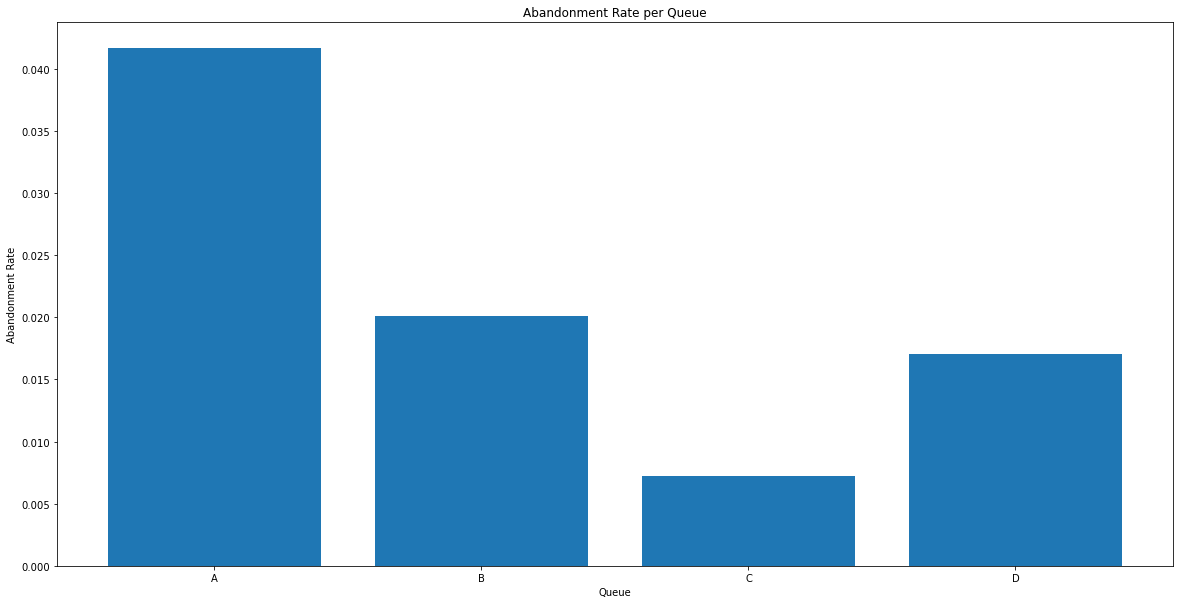

In [127]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

keys = abandonment_rates.keys()
values = abandonment_rates.values()
plt.bar(keys,values)
plt.title('Abandonment Rate per Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')
plt.rcParams['figure.figsize'] = (20,10)

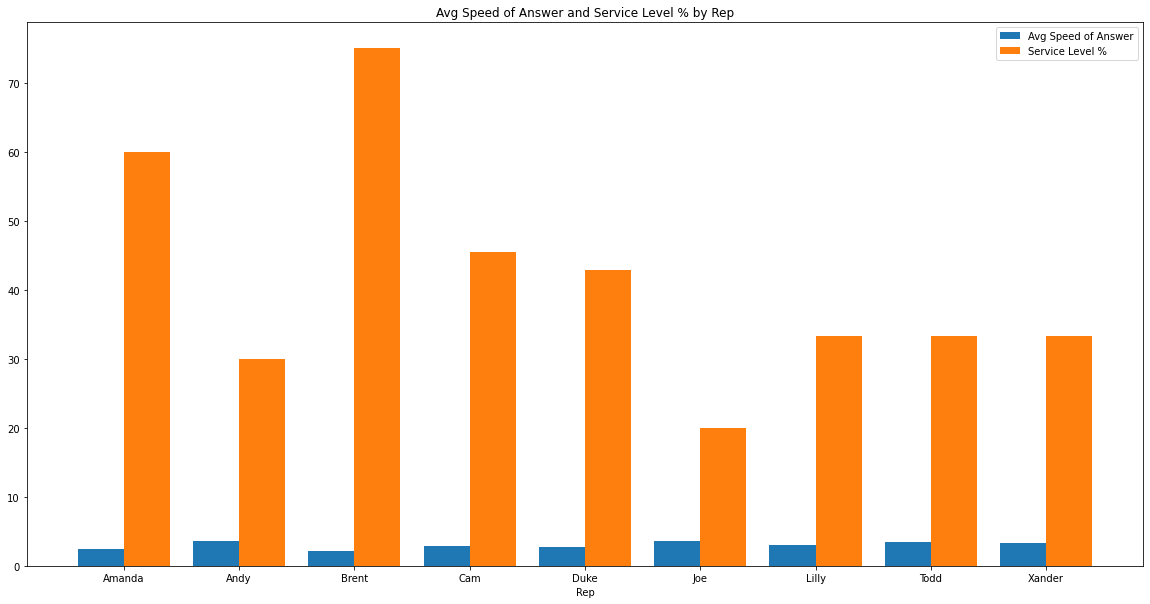

In [126]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# print(north_plt)
# print(service_level)
width = 0.4
x = np.arange(9)
y1 = north_plt['Incoming Wait Time']
y2 = service_level['Service Level %']
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xticks(x,['Amanda','Andy','Brent','Cam','Duke','Joe','Lilly','Todd','Xander'])
plt.legend(['Avg Speed of Answer','Service Level %'])
plt.xlabel('Rep')
plt.title('Avg Speed of Answer and Service Level % by Rep')
plt.rcParams['figure.figsize'] = (20,10)

Text(0.5, 1.0, 'Outgoing vs Incoming Calls by Call Purpose')

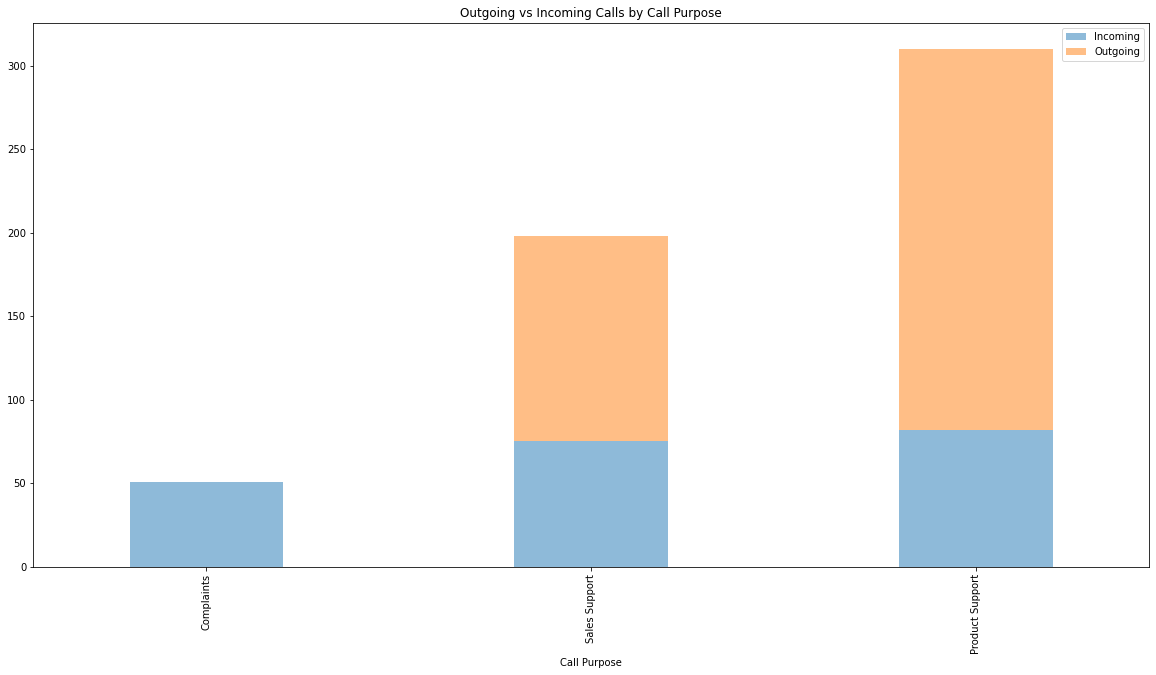

In [164]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#print(purpose_counts.head(5))
complaints['Call Purpose'] = 'Complaints'
sales_support['Call Purpose'] = 'Sales Support'
product_support['Call Purpose'] = 'Product Support'
data = [complaints,sales_support,product_support]
#print(list(sales_support.items()))

viz3df = pd.DataFrame(columns=['Call Purpose','Incoming','Outgoing'],data=data)
viz3df.plot.bar(x='Call Purpose',y=['Incoming','Outgoing'],stacked=True,  width = 0.4,alpha=0.5)
plt.title('Outgoing vs Incoming Calls by Call Purpose')

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.
Visualization 1: I chose to create a bar plot because abandonment rate was being compared across the different queues.
Visualization 2: I chose to create a grouped bar plot to look at both service level and avg speed of answer by rep. The lower avg speed results in a higher service level %, which makes sense.
Visualization 3: I chose to create a stacked bar chart to compare the incoming and outgoing calls by call purpose. The incoming calls are blue and the outgoing calls are orange.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
The South Branch is operating more efficiently. The South Branch has a lower average abandonment rate of 1.27% compared to 2.86% for the North Branch. The South Branch also has a higher service level of 15.29% of calls answered within 2 seconds compared to the 13.47% of calls by the North Branch. The average speed of answer was comparable with 3.0 s at the South Branch compared to the 3.05 s at the North Branch.
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
The North Branch would benefit from extra help because they have only 9 reps to the South Branch's 11. The KPI's discussed in the previous question also support the need for additional help at the North Branch.
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
It would have been helpful to have more information about customer satisfaction after their calls, especially when they had longer wait times. This data could be used to help the reps alter their workflow.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
